In [69]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr
df = pd.read_csv('G1_MVV.txt',sep='\t')
df.head()
mean = df['CH1S001 (1550.076 ; x)'].max()
df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean


sigma = 1.0

filtered_dataset = gaussian_filter(df['CH1S001 (1550.076 ; x)'], sigma=sigma)
df1 = pd.read_excel(r'C:\Users\ashutosh chauhan\OneDrive\Desktop\MVV.xlsx')
corr_1 = filtered_dataset
corr2 = df1['Volume']
corr2_mean = corr2.max()
corr2=corr2[0:15]/corr2_mean
batch_size = 15
num_batches = len(corr_1) // batch_size

correlation_list = []

for i in range(num_batches):
    batch1 = corr_1[i * batch_size: (i + 1) * batch_size]
    batch2 = corr2[0 * batch_size: (1) * batch_size]
    
    correlation, _ = pearsonr(batch1, batch2)
#     print(correlation)
    correlation_list.append(correlation)
print(correlation_list)
print(max(correlation_list))

[0.5372442653000804, -0.7826348358331205, 0.44785665386084017, 0.6005019101940073, 0.14514695647373482, -0.27219590031298413, 0.5038807093399731, -0.8092671865258061, 0.7191186784219179, -0.05223618659085196, 0.5288870141772147, -0.3220688839608284, 0.464643051921384, 0.3125723147112375, -0.6582888398274511, -0.4426237611612678, 0.11233373010667601, 0.18135714650411577, 0.7041132003171534, -0.37368836650868686, -0.5610036814627652, -0.16637709198983297, 0.8070800666549977, 0.07091361026841862, -0.6671937434528625, -0.2525315702819245, -0.3008277323045929, -0.25950269379178403, 0.7445401625341479, -0.7915846052344123, 0.6106419892448472, -0.6148642263853072, 0.36331167915638046, -0.31520129187329465, 0.5143235038906497, 0.10747654843644236, 0.349509728770975, -0.8529909963604023, -0.679593847366165, 0.46822361674570023, -0.8831649435780043, -0.14731052880318748, -0.6051181436989916, 0.5175917087452823, -0.1601478533654409, 0.37613511807769245, 0.32254718644726277, 0.2034529860460641, 0.

In [30]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr

# Load the data
df = pd.read_csv('G1_FVC.txt', sep='\t')
df.head()

# Normalize data
mean = df['CH1S001 (1550.076 ; x)'].max()
df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean

sigma = 1.0
filtered_dataset = gaussian_filter(df['CH1S001 (1550.076 ; x)'], sigma=sigma)

# Load the other data
df1 = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\asdsa.txt",sep = '\t')
corr_1 = filtered_dataset
corr2 = df1['Value']
corr2_mean = corr2.max()
corr2 = corr2[0:8] / corr2_mean

batch_size = 9
num_batches = len(corr_1) // batch_size

correlation_list = []

for i in range(num_batches):
    batch1 = corr_1[i * batch_size: (i + 1) * batch_size]
    batch2 = corr2[i * batch_size: (i + 1) * batch_size]

    correlation, _ = pearsonr(batch1, batch2)
    correlation_list.append(correlation)

# Find the batch with maximum correlation
max_corr_index = correlation_list.index(max(correlation_list))
max_corr_batch1 = corr_1[max_corr_index * batch_size: (max_corr_index + 1) * batch_size]
max_corr_batch2 = corr2[max_corr_index * batch_size: (max_corr_index + 1) * batch_size]

# Create a new DataFrame with the data of the batch with maximum correlation
max_corr_df = pd.DataFrame({'Batch1': max_corr_batch1, 'Batch2': max_corr_batch2})

# Save the data to a new CSV file
max_corr_df.to_csv('max_corr_batch.csv', index=False)

print("Maximum correlation:", max(correlation_list))


ValueError: x and y must have the same length.

Maximum correlation: 0.9898224976452941


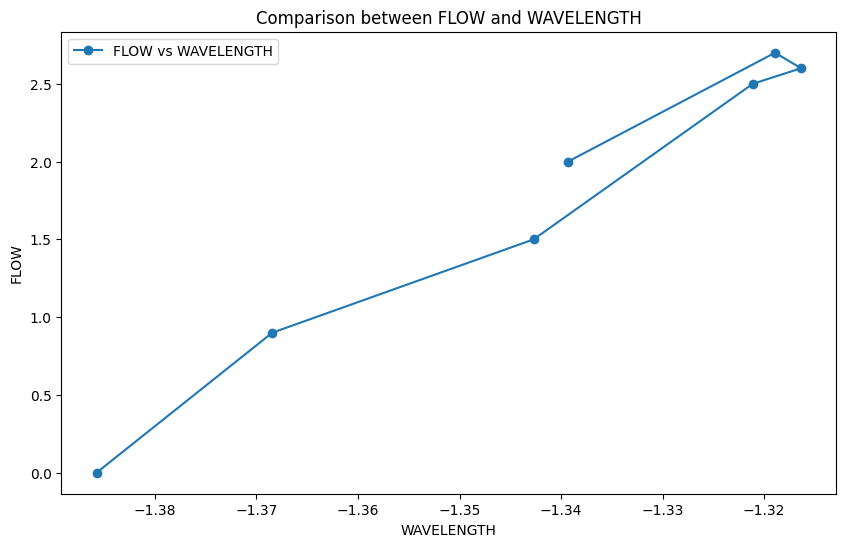

In [2]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv('KA_FVC.txt', sep='\t')
df.head()

# Normalize data
mean = df['CH1S001 (1550.076 ; x)'].max()
df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean

sigma = 1.0
filtered_dataset = gaussian_filter(df['CH1S001 (1550.076 ; x)'], sigma=sigma)

# Load the other data

df1 = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\asdsa.txt",sep = '\t')

batch_size = len(df1)  # Set batch_size to match the length of df1

correlation_list = []

for i in range(len(df) // batch_size):
    batch1 = filtered_dataset[i * batch_size: (i + 1) * batch_size]
    batch2 = df1['Value']

    correlation, _ = pearsonr(batch1, batch2)
    correlation_list.append(correlation)

# Find the batch with maximum correlation
max_corr_index = correlation_list.index(max(correlation_list))
max_corr_batch1 = filtered_dataset[max_corr_index * batch_size: (max_corr_index + 1) * batch_size]
max_corr_batch2 = df1['Value']

# Create a new DataFrame with the data of the batch with maximum correlation
max_corr_df = pd.DataFrame({'Batch1': max_corr_batch1, 'Batch2': max_corr_batch2})

# Save the data to a new CSV file
max_corr_df.to_csv('max_corr_batch.csv', index=False)

print("Maximum correlation:", max(correlation_list))
plt.figure(figsize=(10, 6))
plt.plot(max_corr_batch1, max_corr_batch2, '-o', label='FLOW vs WAVELENGTH')
plt.xlabel('WAVELENGTH')
plt.ylabel('FLOW')
plt.legend()
plt.title('Comparison between FLOW and WAVELENGTH')
plt.show()

Maximum correlation: 0.9927289342973606


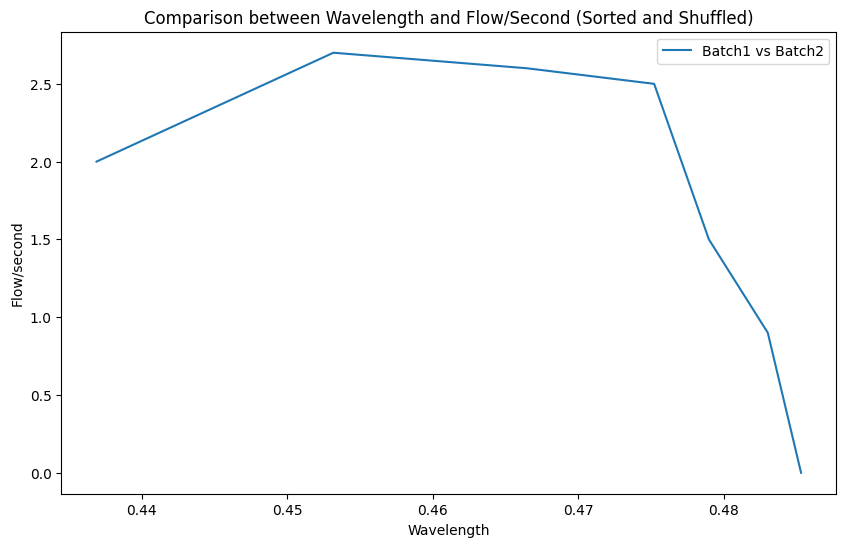

In [54]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('G1_MVV.txt', sep='\t')
df.head()

# Normalize data
mean = df['CH1S001 (1550.076 ; x)'].max()
df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean

sigma = 1.0
filtered_dataset = gaussian_filter(df['CH1S001 (1550.076 ; x)'], sigma=sigma)


df1 = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\asdsa.txt",sep = '\t')

batch_size = len(df1)  # Set batch_size to match the length of df1

correlation_list = []

for i in range(len(df) // batch_size):
    batch1 = filtered_dataset[i * batch_size: (i + 1) * batch_size]
    batch2 = df1['Value']

    correlation, _ = pearsonr(batch1, batch2)
    correlation_list.append(correlation)

# Find the batch with maximum correlation
max_corr_index = correlation_list.index(max(correlation_list))
max_corr_batch1 = filtered_dataset[max_corr_index * batch_size: (max_corr_index + 1) * batch_size]
max_corr_batch2 = df1['Value']

# Sort one of the batches (Batch1)
max_corr_batch1_sorted = np.sort(max_corr_batch1)

# Shuffle the values in the other batch (Batch2)
# np.random.shuffle(max_corr_batch2)

# Create a new DataFrame with the sorted and shuffled data
max_corr_df = pd.DataFrame({'Batch1': max_corr_batch1_sorted, 'Batch2': max_corr_batch2})

# Save the data to a new CSV file
max_corr_df.to_csv('max_corr_batch.csv', index=False)

print("Maximum correlation:", max(correlation_list))

# Plot the graph with a single line joining all the points
plt.figure(figsize=(10, 6))
plt.plot(max_corr_batch1_sorted, max_corr_batch2, label='Batch1 vs Batch2', linestyle='-')
plt.xlabel('Wavelength')
plt.ylabel('Flow/second')
plt.legend()
plt.title('Comparison between Wavelength and Flow/Second (Sorted and Shuffled)')
plt.show()


In [86]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr
df = pd.read_csv('G1_SVC.txt',sep='\t')
df.head()
mean = df['CH1S001 (1550.076 ; x)'].max()
df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean


sigma = 1.0

filtered_dataset = gaussian_filter(df['CH1S001 (1550.076 ; x)'], sigma=sigma)
df1 = pd.read_excel(r'C:\Users\ashutosh chauhan\OneDrive\Desktop\G_SVC.xlsx')
corr_1 = filtered_dataset
corr2 = df1['Volume']
corr2_mean = corr2.max()
corr2=corr2[0:60]/corr2_mean
batch_size = 60
num_batches = len(corr_1) // batch_size

correlation_list = []

for i in range(num_batches):
    batch1 = corr_1[i * batch_size: (i + 1) * batch_size]
    batch2 = corr2[0 * batch_size: (1) * batch_size]
    
    correlation, _ = pearsonr(batch1, batch2)
    correlation_list.append(correlation)

print(max(correlation_list))

0.7108657533059053


In [61]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr
df = pd.read_csv('G1_FVC.txt',sep='\t')
df.head()
mean = df['CH1S001 (1550.076 ; x)'].max()
# df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean
sigma = 1.0

# filtered_dataset = gaussian_filter(df['CH1S001 (1550.076 ; x)'], sigma=sigma)
# df['CH1S001 (1550.076 ; x)'] = filtered_dataset


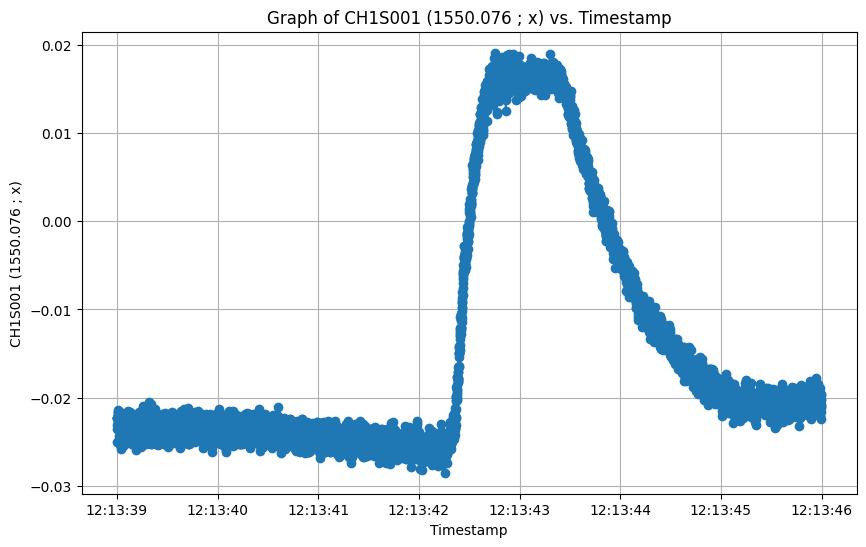

In [62]:
from scipy.integrate import simps

df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])
x = df["Sample"]
y = df["CH1S001 (1550.076 ; x)"]
# area = simps(y, x)
plt.figure(figsize=(10, 6))
plt.plot(df["Timestamp"], df["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Timestamp")
plt.grid(True)
plt.show()
# print(f"Area under the curve: {area}")


In [15]:
area = area/1550.076

In [16]:
print(area)

-3.388879200007487


In [67]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\index.csv",sep=',')
df.head()
# mean = df['CH1S001 (1550.076 ; x)'].max()
# df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean
# sigma = 1.0
# filtered_dataset = gaussian_filter(df['CH1S001 (1550.076 ; x)'], sigma=sigma)
# df['CH1S001 (1550.076 ; x)'] = filtered_dataset

,UTC Date,UTC Time,Sample,CH1S001 (1550.076 ; x)
0,11-08-2023,47:33.6,17552,0.048434
1,11-08-2023,47:33.6,17553,0.030368
2,11-08-2023,47:33.6,17558,0.019431
3,11-08-2023,47:33.6,17559,0.054459
4,11-08-2023,47:33.6,17560,0.026352


In [68]:
from scipy.integrate import simps
import matplotlib.pyplot as plt
df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])
x = df["Sample"]
y = df["CH1S001 (1550.076 ; x)"]
area = simps(y, x)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(df["Timestamp"], df["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Timestamp")
plt.grid(True)

# Show the plot
plt.show()

# Print the area under the curve
print(f"Area under the curve: {area}")

C:\Users\ashutosh chauhan\AppData\Local\Temp\ipykernel_3884\347958195.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])


DateParseError: hour must be in 0..23: 11-08-2023 47:33.6, at position 0

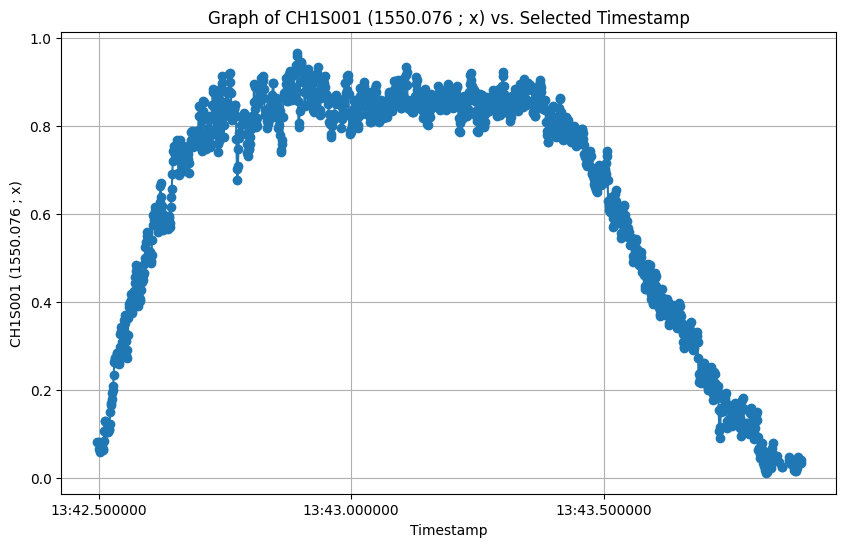

Area under the curve for y > 0: 876.160230968766


In [67]:
from scipy.integrate import simps
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\G1_FVC.txt",sep='\t')
df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])
mean = df['CH1S001 (1550.076 ; x)'].max()
df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean
# Filter data points where y is greater than 0

filtered_data = df[df["CH1S001 (1550.076 ; x)"] > 0]
# filtered_data = df
sigma = 1.0

filtered_dataset = gaussian_filter(filtered_data['CH1S001 (1550.076 ; x)'], sigma=sigma)
x = filtered_data["Sample"]
y = filtered_dataset
# filtered_data.to_csv('index.csv')
area = simps(y, x)


plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Timestamp"], filtered_dataset, marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Selected Timestamp")
plt.grid(True)

# Show the plot
plt.show()
# area = (area/len(filtered_data))*1000
# Print the area under the curve for points where y > 0
print(f"Area under the curve for y > 0: {area}")


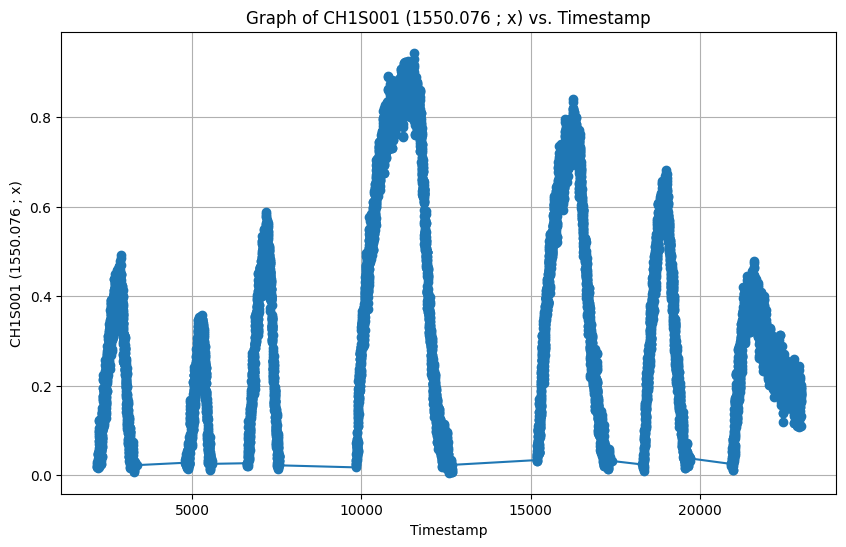

Area under the curve for y > 0: 868.1592206915034


In [24]:
import pandas as pd
from scipy.integrate import simps
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\v1_svc.txt", sep='\t')

# Convert the "UTC Date" and "UTC Time" columns to a Timestamp column
df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

# Create a new "seconds" column starting from 1
df["seconds"] = range(1, len(df) + 1)

# Normalize your data
mean = df['CH1S001 (1550.076 ; x)'].max()
df['CH1S001 (1550.076 ; x)'] = df['CH1S001 (1550.076 ; x)'] / mean

# Filter data points where y is greater than 0
filtered_data = df[df["CH1S001 (1550.076 ; x)"] > 0]
sigma = 1.0

filtered_dataset = gaussian_filter(filtered_data['CH1S001 (1550.076 ; x)'], sigma=sigma)
x = filtered_data["seconds"]  # Use the new "seconds" column
y = filtered_dataset

area = simps(y, x)

plt.figure(figsize=(10, 6))
plt.plot(filtered_data["seconds"], filtered_dataset, marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Timestamp")
plt.grid(True)
plt.show()

# Print the area under the curve for points where y > 0
print(f"Area under the curve for y > 0: {area}")


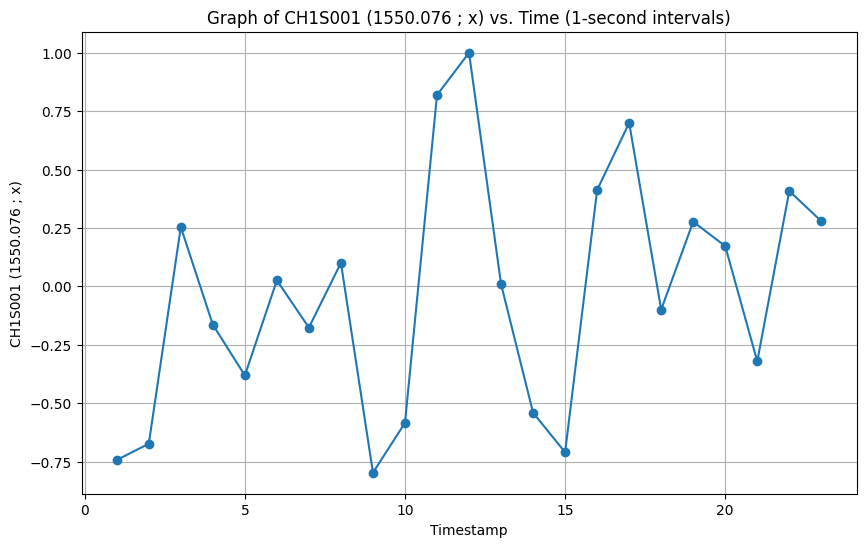

Area under the curve: -0.2992306445472266


In [26]:
import pandas as pd

# Load your original data
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\v1_svc.txt", sep='\t')

# Convert the "UTC Date" and "UTC Time" columns to a Timestamp column
df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

# Create a new dataframe with the average of every 1000 samples
window_size = 1000
new_df = df.groupby(df.index // window_size).agg({
    "Timestamp": "first",
    "CH1S001 (1550.076 ; x)": "mean"
})

# Create a "seconds" column in the new dataframe
new_df["seconds"] = range(1, len(new_df) + 1)

# Normalize your data
mean = new_df['CH1S001 (1550.076 ; x)'].max()
new_df['CH1S001 (1550.076 ; x)'] = new_df['CH1S001 (1550.076 ; x)'] / mean
new_df["CH1S001 (1550.076 ; x)"] = new_df["CH1S001 (1550.076 ; x)"] 
# new_df["CH1S001 (1550.076 ; x)"] = new_df[new_df["CH1S001 (1550.076 ; x)"]>0]
# new_df = new_df[new_df["CH1S001 (1550.076 ; x)"] > 0]
# Plot the new dataframe
import matplotlib.pyplot as plt

x = new_df["seconds"]
y = new_df["CH1S001 (1550.076 ; x)"] 

plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Time (1-second intervals)")
plt.grid(True)
plt.show()

# Calculate the area under the curve
from scipy.integrate import simps

area = simps(y, x)

print(f"Area under the curve: {area}")


In [ ]:
import pandas as pd

# Load your original data
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\G1_FVC.txt", sep='\t')

# Convert the "UTC Date" and "UTC Time" columns to a Timestamp column
df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

# Create a new dataframe with the average of every 1000 samples
window_size = 1000
new_df = df.groupby(df.index // window_size).agg({
    "Timestamp": "first",
    "CH1S001 (1550.076 ; x)": "mean"
})

# Create a "seconds" column in the new dataframe
new_df["seconds"] = range(1, len(new_df) + 1)

# Normalize your data
mean = new_df['CH1S001 (1550.076 ; x)'].max()
new_df['CH1S001 (1550.076 ; x)'] = new_df['CH1S001 (1550.076 ; x)'] / mean
new_df["CH1S001 (1550.076 ; x)"] = new_df["CH1S001 (1550.076 ; x)"] + 1.5
# new_df["CH1S001 (1550.076 ; x)"] = new_df[new_df["CH1S001 (1550.076 ; x)"]>0]
# new_df = new_df[new_df["CH1S001 (1550.076 ; x)"] > 0]
# Plot the new dataframe
import matplotlib.pyplot as plt

x = new_df["seconds"]
y = new_df["CH1S001 (1550.076 ; x)"] 

plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Time (1-second intervals)")
plt.grid(True)
plt.show()

# Calculate the area under the curve
from scipy.integrate import simps

area = simps(y, x)

print(f"Area under the curve: {area}")


In [36]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame containing the data
# You may need to load or create the DataFrame

# Find where the values transition from below 0 to above 0
threshold = 0
above_threshold = (df["CH1S001 (1550.076 ; x)"] > threshold).astype(int)
transitions = np.diff(above_threshold)

# Initialize variables for tracking the start and end timestamps
start_timestamp = None
end_timestamp = None

for i, transition in enumerate(transitions):
    if transition == 1:  # Transition from below to above threshold
        start_timestamp = df["Timestamp"].iloc[i]
    elif transition == -1:  # Transition from above to below threshold
        end_timestamp = df["Timestamp"].iloc[i - 1]
        print(f"Section {i} - Start: {start_timestamp}, End: {end_timestamp}")
        start_timestamp = None
        end_timestamp = None

# Check for the last section (if it's above threshold)
if start_timestamp is not None:
    end_timestamp = df["Timestamp"].iloc[-1]
    print(f"Section {i + 1} - Start: {start_timestamp}, End: {end_timestamp}")


Section 3404 - Start: 2023-11-08 13:01:45.403000, End: 2023-11-08 13:01:45.403000
Section 3428 - Start: 2023-11-08 13:01:45.426000, End: 2023-11-08 13:01:45.427000
Section 3446 - Start: 2023-11-08 13:01:45.435000, End: 2023-11-08 13:01:45.445000
Section 5936 - Start: 2023-11-08 13:01:45.447000, End: 2023-11-08 13:01:47.935000
Section 5943 - Start: 2023-11-08 13:01:47.937000, End: 2023-11-08 13:01:47.942000
Section 5978 - Start: 2023-11-08 13:01:47.946000, End: 2023-11-08 13:01:47.977000
Section 5990 - Start: 2023-11-08 13:01:47.983000, End: 2023-11-08 13:01:47.989000
Section 6006 - Start: 2023-11-08 13:01:47.992000, End: 2023-11-08 13:01:48.005000
Section 6036 - Start: 2023-11-08 13:01:48.029000, End: 2023-11-08 13:01:48.035000
Section 6068 - Start: 2023-11-08 13:01:48.067000, End: 2023-11-08 13:01:48.067000
Section 7546 - Start: 2023-11-08 13:01:49.541000, End: 2023-11-08 13:01:49.545000
Section 7571 - Start: 2023-11-08 13:01:49.564000, End: 2023-11-08 13:01:49.570000
Section 7575 - S

In [37]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# You may need to load or create the DataFrame

# Sort the data by timestamp
df = df.sort_values(by="Timestamp")

# Calculate the time gaps between consecutive timestamps
df["time_gap"] = df["Timestamp"].diff()

# Find the index of the row with the largest time gap
max_gap_index = df["time_gap"].idxmax()

# Print the timestamps with the highest gap
start_timestamp = df.loc[max_gap_index, "Timestamp"]
end_timestamp = df.loc[max_gap_index + 1, "Timestamp"]
print(f"Timestamps with the highest gap between them:")
print(f"Start: {start_timestamp}, End: {end_timestamp}")


Timestamps with the highest gap between them:
Start: 2023-11-08 13:01:42.001000, End: 2023-11-08 13:01:42.002000


In [38]:
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Define the start and end timestamps
start_timestamp = pd.Timestamp("11-08-2023 13:01:42.001000")
end_timestamp = pd.Timestamp("11-08-2023 13:01:42.002000")

# Filter data points based on the timestamp range
filtered_data = df[(df["Timestamp"] >= start_timestamp) & (df["Timestamp"] <= end_timestamp) & (df["CH1S001 (1550.076 ; x)"] > 0)]

x = filtered_data["Sample"]
y = filtered_data["CH1S001 (1550.076 ; x)"]
area = simps(y, x)

# Plot the graph for the specified time range
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Timestamp"], filtered_data["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title(f"Graph of CH1S001 (1550.076 ; x) vs. Timestamp\n({start_timestamp} to {end_timestamp})")
plt.grid(True)

# Show the plot
plt.show()

# Print the area under the curve for the specified time range and y > 0
print(f"Area under the curve for ({start_timestamp} to {end_timestamp}) where y > 0: {area}")


IndexError: index -1 is out of bounds for axis 0 with size 0

In [21]:
import pandas as pd
from scipy.integrate import simps
import matplotlib.pyplot as plt

def analyze_data(file_path, start_timestamp, end_timestamp):
    # Read the data from the file
    df = pd.read_csv(file_path,sep='\t')  # Adjust the file format (e.g., CSV) as needed

    # Convert the "UTC Date" and "UTC Time" columns to a datetime column
    df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

    # Filter data points based on the timestamp range and y > 0
    filtered_data = df[(df["Timestamp"] >= start_timestamp) & (df["Timestamp"] <= end_timestamp) & (df["CH1S001 (1550.076 ; x)"] > 0)]

    if not filtered_data.empty:
        x = filtered_data["Sample"]
        y = filtered_data["CH1S001 (1550.076 ; x)"]
        area = simps(y, x)

        # Plot the graph for the specified time range
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_data["Timestamp"], filtered_data["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
        plt.xlabel("Timestamp")
        plt.ylabel("CH1S001 (1550.076 ; x)")
        plt.title(f"Graph of CH1S001 (1550.076 ; x) vs. Timestamp\n({start_timestamp} to {end_timestamp})")
        plt.grid(True)

        # Show the plot
        plt.show()

        # Print the area under the curve for the specified time range and y > 0
        print(f"Area under the curve for ({start_timestamp} to {end_timestamp}) where y > 0: {area}")
    else:
        print("No data points found in the specified time range and with y > 0.")

# Example usage:
file_path = r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\G1_SVC.txt" # Replace with the actual file path
start_timestamp = pd.Timestamp("11-08-2023 13:01:55")
end_timestamp = pd.Timestamp("11-08-2023 13:01:56")
analyze_data(file_path, start_timestamp, end_timestamp)


No data points found in the specified time range and with y > 0.


In [48]:
import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

def analyze_data(file_path):
    # Read the data from the file
    df = pd.read_csv(file_path,sep = '\t')  # Adjust the file format (e.g., CSV) as needed

    # Convert the "UTC Date" and "UTC Time" columns to a datetime column
    df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

    # Filter data points based on the value being greater than 0
    filtered_data = df[df["CH1S001 (1550.076 ; x)"] > 0]

    if not filtered_data.empty:
        # Calculate the time gaps between consecutive timestamps for the filtered data
        filtered_data["time_gap"] = filtered_data["Timestamp"].diff()

        # Find the index of the row with the largest time gap
        max_gap_index = filtered_data["time_gap"].idxmax()

        # Get the start and end timestamps with the highest gap
        start_timestamp = filtered_data.loc[max_gap_index, "Timestamp"]
        end_timestamp = filtered_data.loc[max_gap_index + 1, "Timestamp"]

        x = filtered_data["Sample"]
        y = filtered_data["CH1S001 (1550.076 ; x)"]
        area = simps(y, x)

        # Plot the graph for the specified time range
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_data["Timestamp"], filtered_data["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
        plt.xlabel("Timestamp")
        plt.ylabel("CH1S001 (1550.076 ; x)")
        plt.title(f"Graph of CH1S001 (1550.076 ; x) vs. Timestamp\n({start_timestamp} to {end_timestamp})")
        plt.grid(True)

        # Show the plot
        plt.show()

        # Print the area under the curve for the specified time range
        print(f"Area under the curve for the maximum gap ({start_timestamp} to {end_timestamp}): {area}")
    else:
        print("No data points found where the value is above 0.")

# Example usage:
file_path = r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\S1_SVC.txt"
analyze_data(file_path)


C:\Users\ashutosh chauhan\AppData\Local\Temp\ipykernel_3884\2414443819.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["time_gap"] = filtered_data["Timestamp"].diff()


KeyError: 25235

In [49]:
import pandas as pd
from scipy.integrate import simps
import matplotlib.pyplot as plt

def analyze_data(file_path):
    # Read the data from the file
    df = pd.read_csv(file_path,sep = '\t')  # Adjust the file format (e.g., CSV) as needed

    # Convert the "UTC Date" and "UTC Time" columns to a datetime column
    df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

    # Filter data points based on the value being greater than 0
    filtered_data = df[df["CH1S001 (1550.076 ; x)"] > 0]

    if not filtered_data.empty:
        # Calculate the time gaps between consecutive timestamps for the filtered data
        time_diff = filtered_data["Timestamp"].diff().fillna(pd.Timedelta(seconds=0))

        # Find the row index corresponding to the maximum time gap
        max_gap_index = time_diff.idxmax()

        # Get the start and end timestamps with the highest gap
        start_timestamp = filtered_data.loc[max_gap_index, "Timestamp"]
        end_timestamp = filtered_data.loc[max_gap_index + 1, "Timestamp"]

        x = filtered_data["Sample"]
        y = filtered_data["CH1S001 (1550.076 ; x)"]
        area = simps(y, x)

        # Plot the graph for the specified time range
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_data["Timestamp"], filtered_data["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
        plt.xlabel("Timestamp")
        plt.ylabel("CH1S001 (1550.076 ; x)")
        plt.title(f"Graph of CH1S001 (1550.076 ; x) vs. Timestamp\n({start_timestamp} to {end_timestamp})")
        plt.grid(True)

        # Show the plot
        plt.show()

        # Print the area under the curve for the specified time range
        print(f"Area under the curve for the maximum gap ({start_timestamp} to {end_timestamp}): {area}")
    else:
        print("No data points found where the value is above 0.")

# Example usage:
# file_path = "your_data.csv"  # Replace with the actual file path
analyze_data(file_path)


KeyError: 25235

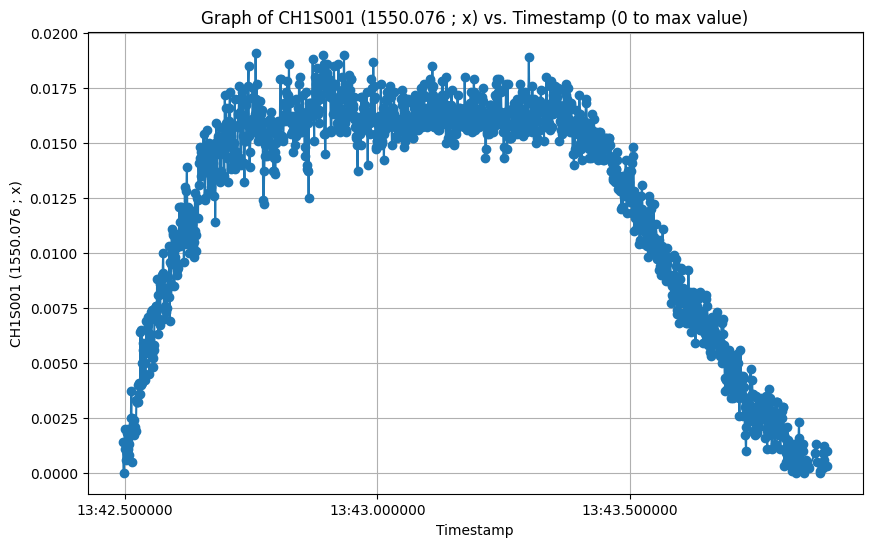

Area under the curve (0 to max value): 16.71560833333333


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
df = pd.read_csv('G1_FVC.txt',sep='\t')

df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

# Find the maximum value in the data
max_value = df["CH1S001 (1550.076 ; x)"].max()

# Filter the data to include only values between 0 and max_value
filtered_df = df[df["CH1S001 (1550.076 ; x)"] >= 0]

# Calculate the area under the curve using the trapezoidal rule
x = filtered_df["Sample"]
y = filtered_df["CH1S001 (1550.076 ; x)"]
area = simps(y, x)

# Plot the filtered graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["Timestamp"], filtered_df["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Timestamp (0 to max value)")
plt.grid(True)

# Show the plot
plt.show()

# Print the area under the curve
print(f"Area under the curve (0 to max value): {area}")


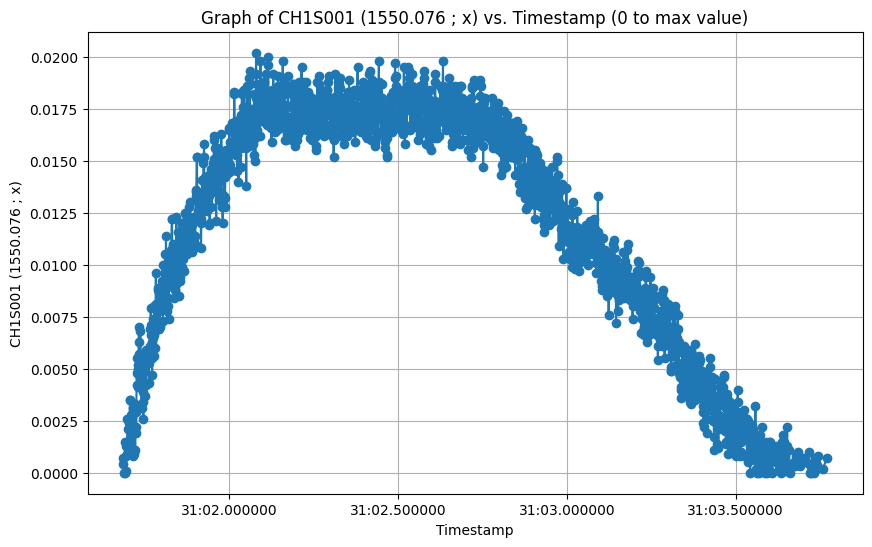

Area under the curve (0 to max value): 23.473794210164833


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
df = pd.read_csv('v1_fvc.txt',sep='\t')

df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

# Find the maximum value in the data
max_value = df["CH1S001 (1550.076 ; x)"].max()

# Filter the data to include only values between 0 and max_value
filtered_df = df[df["CH1S001 (1550.076 ; x)"] >= 0]

# Calculate the area under the curve using the trapezoidal rule
x = filtered_df["Sample"]
y = filtered_df["CH1S001 (1550.076 ; x)"]
area = simps(y, x)

# Plot the filtered graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["Timestamp"], filtered_df["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Timestamp (0 to max value)")
plt.grid(True)

# Show the plot
plt.show()

# Print the area under the curve
print(f"Area under the curve (0 to max value): {area}")


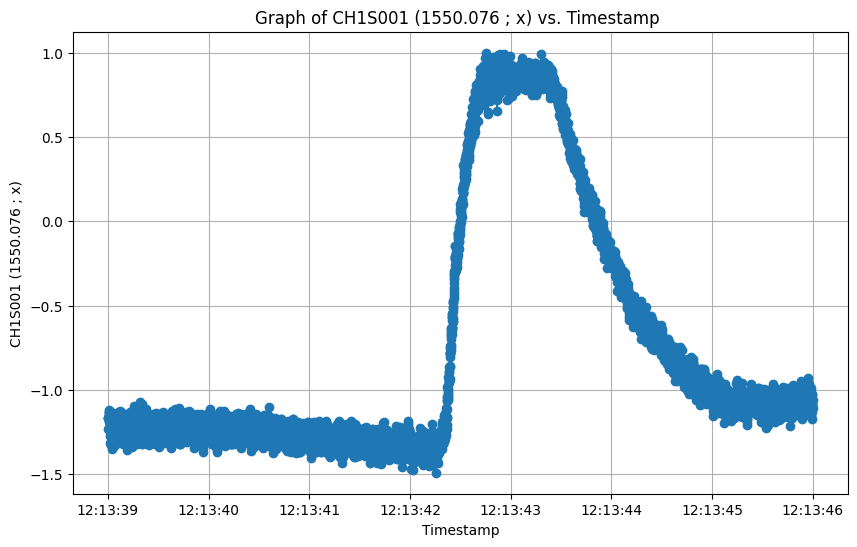

Area under the upward slope: -5250.508726003491


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps


# Convert UTC Date and UTC Time columns to a single datetime column
df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

# Find the index where the data starts to increase
start_index = (df["CH1S001 (1550.076 ; x)"].diff() > 0).idxmax()

# Filter the data to include only values from the start_index to the end
filtered_df = df.iloc[start_index:]

# Calculate the area under the curve using the trapezoidal rule
x = filtered_df["Sample"]
y = filtered_df["CH1S001 (1550.076 ; x)"]
area = simps(y, x)

# Plot the filtered graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["Timestamp"], filtered_df["CH1S001 (1550.076 ; x)"], marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Timestamp ")
plt.grid(True)

# Show the plot
plt.show()

# Print the area under the curve for the upward slope
print(f"Area under the upward slope: {area}")
